# Nhiệm vụ 1 : Làm quen với dữ liệu và Matplotlib
+ <blackquote> <b> a. Tải tập dữ liệu và sử dụng pandas đọc dữ liệu 



In [1]:
import pyspark
from pyspark.sql import SparkSession
import findspark
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
findspark.init
spark = SparkSession.builder.appName('mid-term').getOrCreate()
df_midterm = spark.read.csv(r'HR_comma_sep.csv',header= True, inferSchema=True)
df_pandas = df_midterm.toPandas()
print(df_pandas)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

+ <blackquote> <b> b. Phân tích cơ bản dùng Info() và Describe() để hiểu cấu trúc và các đặc điểm của dữ liệu

In [9]:
df_pandas.info
df_midterm.describe().show()

+-------+-------------------+-------------------+------------------+--------------------+------------------+-------------------+-------------------+---------------------+---------+------+
|summary| satisfaction_level|    last_evaluation|    number_project|average_montly_hours|time_spend_company|      Work_accident|               left|promotion_last_5years|    sales|salary|
+-------+-------------------+-------------------+------------------+--------------------+------------------+-------------------+-------------------+---------------------+---------+------+
|  count|              14999|              14999|             14999|               14999|             14999|              14999|              14999|                14999|    14999| 14999|
|   mean| 0.6128335222348166| 0.7161017401159978|  3.80305353690246|   201.0503366891126| 3.498233215547703| 0.1446096406427095| 0.2380825388359224| 0.021268084538969265|     NULL|  NULL|
| stddev|0.24863065106114257|0.17116911062327556|1.232592355

<b>c. Sử dụng Matplotlib để vẽ:</b>
+ <blockquote>Một biểu đồ cột (bar plot) thể hiện số lượng nhân viên theo mức lương (salary).<br>
+ <blockquote>Một biêu đồ phân tán (scatter plot) giữa satisfaction_level và last_evaluation, với màu sắc khác nhau cho nhân viên đã nghỉ việc (left nghỉ việc (left = 0).
= 1) và chưa

<BarContainer object of 3 artists>

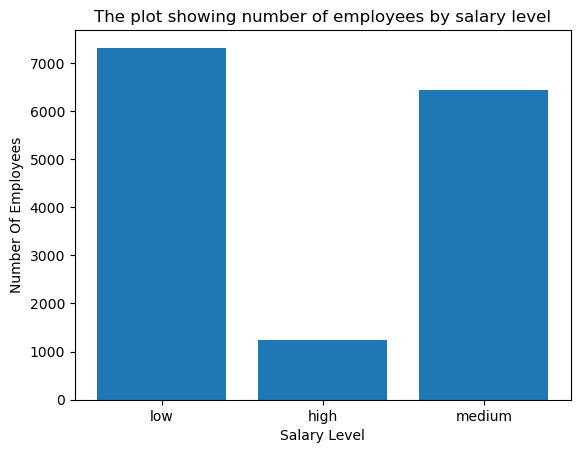

In [14]:
salary_bar = df_midterm.groupBy('salary').count().toPandas()
plt.xlabel('Salary Level')
plt.ylabel('Number Of Employees')
plt.title('The plot showing number of employees by salary level')
plt.bar(salary_bar['salary'],salary_bar['count'], data=salary_bar)

Text(0.5, 1.0, 'Scatter plot between Satisfaction Level and Last Evaluation')

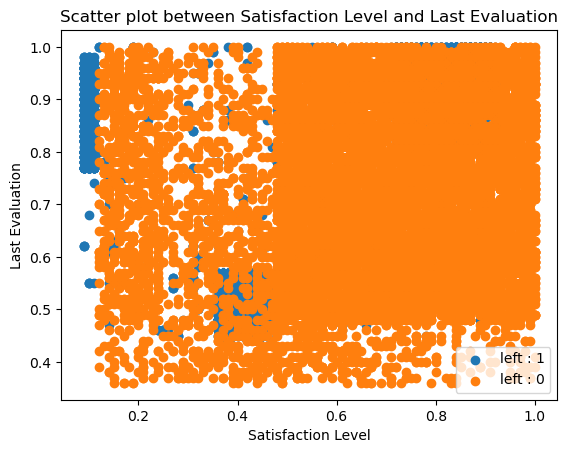

In [31]:
left = df_pandas[df_pandas['left'] == 1]
still = df_pandas[df_pandas['left'] == 0]
plt.scatter(x = left['satisfaction_level'],y= left['last_evaluation'], label = 'left : 1')
plt.scatter(x = still['satisfaction_level'],y= still['last_evaluation'], label = 'left : 0')
plt.legend()
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title("Scatter plot between Satisfaction Level and Last Evaluation")



#   Nội dung 2: Trực quan hóa nâng cao với Seaborn
+  Nhiệm vụ:
-  <blockquote> a. Sử dụng Seaborn để vẽ:
Một Implot giữa satisfaction_level và last_evaluation với hue='left' (xem trang 151-153). Một boxplot so sánh phân phối satisfaction_level theo mức lương (salary) (xem trang 156-157).
Một countplot thể hiện số lượng nhân viên theo salary, phân loại theo left (xem trang 159-161).
-  <blockquote> b. Viết nhận xét ngắn về xu hướng hoặc mối quan hệ mà bạn nhận thấy từ các biểu đồ.

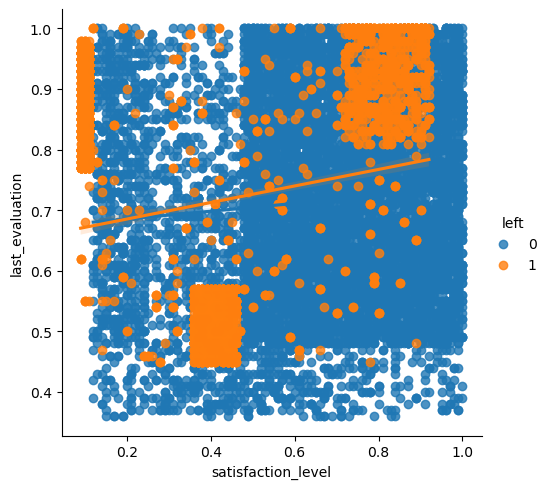

In [50]:
#Import seaborn Libary
import seaborn as sns


#Lmplot between Satisfaction Level and Last Evaluation with Hue = ' Left '
sns.lmplot(x = 'satisfaction_level',
           y = 'last_evaluation',
           data = df_pandas,
           hue = 'left')
plt.show()

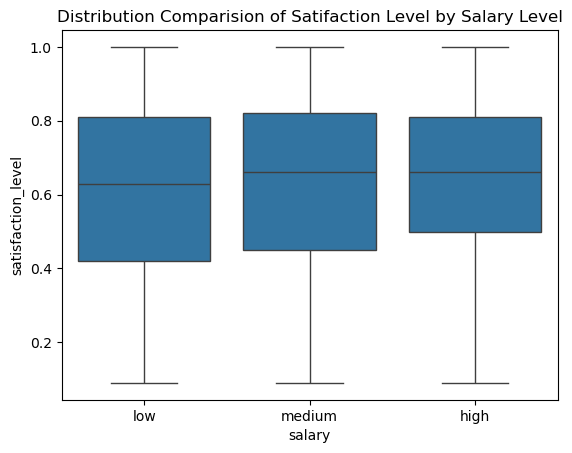

In [49]:
#A boxplot comparing the distribution of satisfaction level by salary level
sns.boxplot(x = 'salary',
            y = 'satisfaction_level',
            data = df_pandas)
plt.title('Distribution Comparision of Satifaction Level by Salary Level')
plt.show()

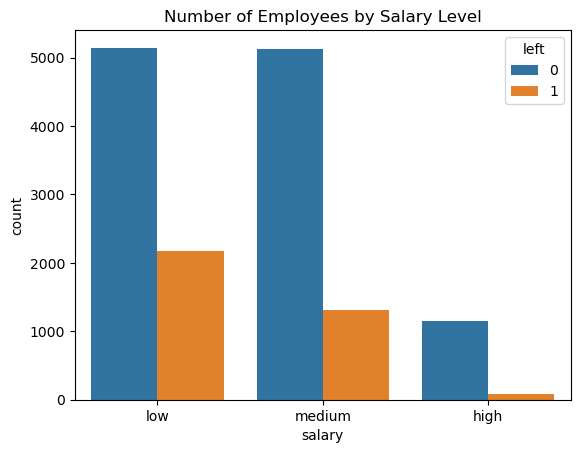

In [47]:
#Countplot show number of employees by salary level, categoried by left column
sns.countplot(x= 'salary',data =df_pandas, hue = 'left')
plt.title('Number of Employees by Salary Level')
plt.show()


In [51]:
#Short comment about tendency or relationship you see from each plot